## Levlat plots for PI-PD difference and difference between models

### Div imports

In [19]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (np, plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.plot.plot_levlat import plot_levlat_abs, get_cbar_label
from sect_sens.util.plot.plot_levlat import plot_levlat_diff
from sect_sens.util.practical_functions import make_folders
from useful_scit.plot.fig_manip import subp_insert_abc
from sect_sens.util.plot.levlat_PIPD import abs_diffs

In [20]:
from IPython.display import clear_output

from sect_sens.data_info.simulation_types import get_casen_by_type_mod

from sect_sens.util.slice_average.significance import calc_significance_field

In [21]:
from sect_sens.data_info.simulation_types import get_abs_by_type

from sect_sens.util.slice_average.avg_pkg import yearly_mean_dic
from sect_sens.util.slice_average.significance import hatch_area_sign

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings:

In [22]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0008-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [23]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]

cases = cases_orig + cases_sec

In [24]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    H2SO4=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N_AER=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N=colors.SymLogNorm(vmin=-2e2, vmax=2e2, linthresh=1, base=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=10),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10)
)

## Plot function:

In [26]:
var = 'NCONC01'


# dic_means_yr = yearly_mean_dic(['NCONC01'], cases, startyear, endyear, pmin, pressure_adjust,
#                                   avg_over_lev=avg_over_lev, groupby=None, dims=('lev',), area='Global')
def add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None):
    if case_types is None:
        case_types = ['PI', 'PD']
    PI = case_types[0]
    PD = case_types[1]
    c1 = get_casen_by_type_mod(PI, ctrl)
    c2 = get_casen_by_type_mod(PD, ctrl)
    da1 = dic_means_yr[c2][var] - dic_means_yr[c1][var]
    co1 = get_casen_by_type_mod(PI, case_oth)
    co2 = get_casen_by_type_mod(PD, case_oth)

    da2 = dic_means_yr[co2][var] - dic_means_yr[co1][var]

    case1 = 'Delta_PD-PI_' + ctrl
    case2 = 'Delta_PD-PI_' + case_oth
    T, data4comp, sig_map, t = calc_significance_field(case1, case2, da1, da2, 'time', 0.95)
    hatch_area_sign(t, T, ax, transform=None,  # ccrs.PlateCarree(),
                    hatches=['..', ''],
                    hatch_lw=.6

                    )


def add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None):
    if case_types is None:
        case_types = ['PI', 'PD']
    PI = case_types[0]
    PD = case_types[1]
    c1 = get_casen_by_type_mod(PI, ctrl)
    c2 = get_casen_by_type_mod(PD, ctrl)
    da1 = dic_means_yr[c2][var]
    da2 = dic_means_yr[c1][var]  # dic_means_yr[co2][var]-dic_means_yr[co1][var]

    case1 = 'Delta_PD-PI_' + ctrl
    case2 = 'Delta_PD-PI_' + case_oth
    T, data4comp, sig_map, t = calc_significance_field(case1, case2, da1, da2, 'time', 0.95)
    hatch_area_sign(t, T, ax, transform=None,
                    # hatches=hatches,
                    hatches=['..', ''],
                    hatch_lw=.6
                    # hatch_lw = hatch_lw,
                    # reverse=reverse
                    )

## Savepaths:

In [27]:
version = 'diffs'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

## Variables to load: 

In [28]:
varl = ['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'N100', 'N250', 'FREQL', 'N50', 'N150', 'N200',
        'N_AER']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'N100', 'N250', 'FREQL', 'N50', 'N150', 'N200', 'N_AER']


In [29]:
case_dic = get_averaged_fields.get_levlat_cases(cases, varl, startyear, endyear,
                                                pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AWNC_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/AREL_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/HYGRO01_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/CLDLIQ_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/N100_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def/N250_0004-01-0008-12.nc
Loading file /

In [30]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI', case_types=['PI', 'PIaerPD'],
                            # mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


In [31]:

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI', 'PIaerPD'],
                          mod_types=None)

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


In [32]:
dic_diff.keys()
di_dic = dic_diff['PIaerPD-PI']
di_dic.keys()

dict_keys(['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'])

In [33]:
cases_oth = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
ctrl = 'OsloAeroSec'

In [34]:
def _get_dic_axs(axs, ctrl, cases_oths):
    axs_dic = {}
    for i, v in enumerate(vl):
        print(i, v)

        axs_dic[v] = {}
        for j, c in enumerate([ctrl, *cases_oths]):
            axs_dic[v][c] = axs[j, i]
    return axs_dic

## Plots:

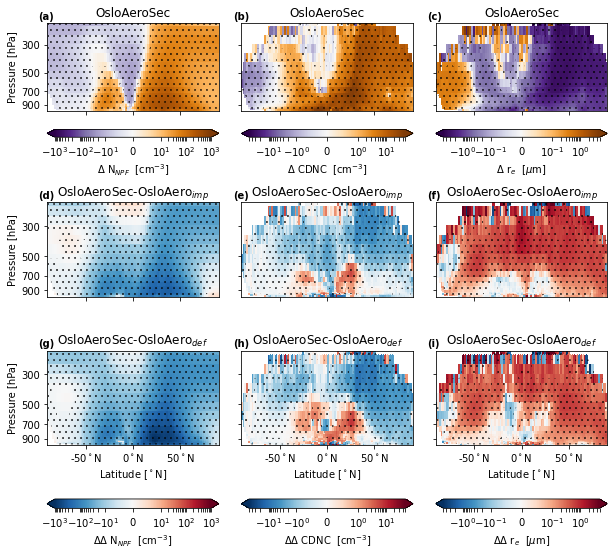

In [37]:
vl = [
    'NCONC01',
    'AWNC_incld',
    'AREL_incld'
]
ctrl = 'OsloAeroSec'
cases_oths = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
axs, fig = abs_diffs(di_dic, ctrl, cases_oths, vl, switch_diff=True, norm_dic=norm_dic)
# sns.despine(fig)

dic_means_yr = yearly_mean_dic(vl, cases, startyear, endyear, pmin, pressure_adjust,
                               avg_over_lev=avg_over_lev, groupby=None, dims=('lon',), area='Global')

axs_dic = _get_dic_axs(axs, ctrl, cases_oths)
for var in vl:
    for case_oth in cases_oths:
        ax = axs_dic[var][case_oth]

        add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None)
    ax = axs_dic[var][ctrl]
    add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None)
clear_output()

fig.savefig(plot_path + '/N_cld_props_abs_diff.png')
plt.show()

In [38]:
import numpy as np

In [39]:
np.e

2.718281828459045

In [40]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=np.exp(1)),
    H2SO4=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=np.exp(1)),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=np.exp(1)),
    N_AER=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=np.exp(1)),
    N=colors.SymLogNorm(vmin=-2e2, vmax=2e2, linthresh=1, base=np.exp(1)),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=np.exp(1)),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=np.exp(1)),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=np.exp(1))
)

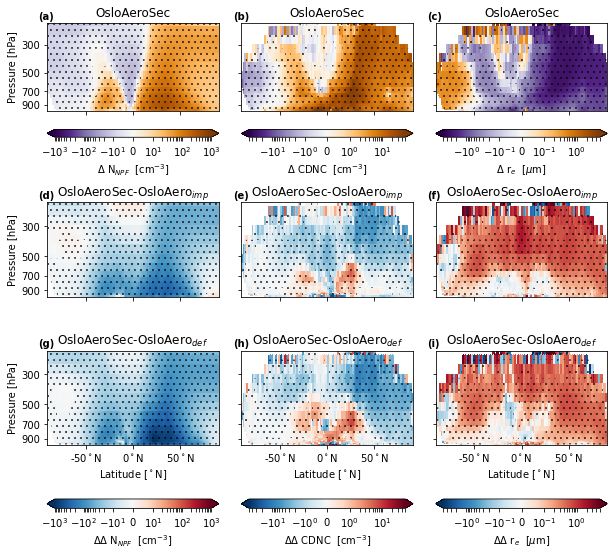

In [41]:
vl = [
    'NCONC01',
    'AWNC_incld',
    'AREL_incld'
]
ctrl = 'OsloAeroSec'
cases_oths = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
axs, fig = abs_diffs(di_dic, ctrl, cases_oths, vl, switch_diff=True, norm_dic=norm_dic)
# sns.despine(fig)

dic_means_yr = yearly_mean_dic(vl, cases, startyear, endyear, pmin, pressure_adjust,
                               avg_over_lev=avg_over_lev, groupby=None, dims=('lon',), area='Global')

axs_dic = _get_dic_axs(axs, ctrl, cases_oths)
for var in vl:
    for case_oth in cases_oths:
        ax = axs_dic[var][case_oth]

        add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None)
    ax = axs_dic[var][ctrl]
    add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None)
clear_output()

fig.savefig(plot_path + '/N_cld_props_abs_diff.png')
plt.show()

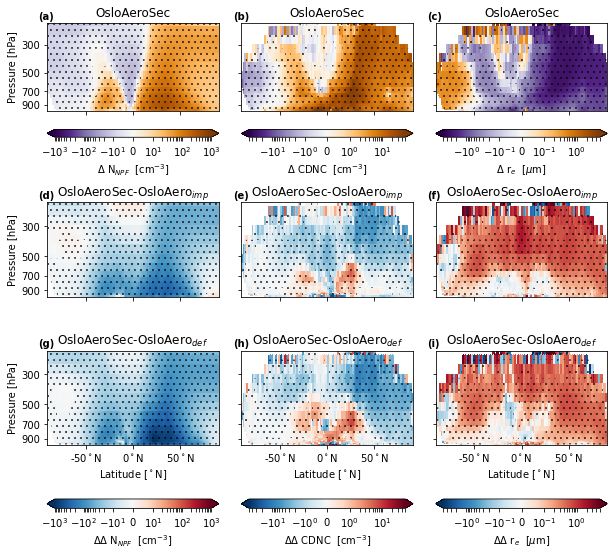

In [67]:
vl = [
    'NCONC01',
    'AWNC_incld',
    'AREL_incld'
]
ctrl = 'OsloAeroSec'
cases_oths = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
axs, fig = abs_diffs(di_dic, ctrl, cases_oths, vl, switch_diff=True, norm_dic=norm_dic)
# sns.despine(fig)

dic_means_yr = yearly_mean_dic(vl, cases, startyear, endyear, pmin, pressure_adjust,
                               avg_over_lev=avg_over_lev, groupby=None, dims=('lon',), area='Global')

axs_dic = _get_dic_axs(axs, ctrl, cases_oths)

for var in vl:
    for case_oth in cases_oth:
        ax = axs_dic[var][case_oth]

        add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None)
    ax = axs_dic[var][ctrl]
    add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None)
clear_output()

fig.savefig(plot_path + '/N_cld_props_abs_diff.png')
plt.show()